<a href="https://colab.research.google.com/github/jubotero/cursoML/blob/master/S04/SummanS04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Curso de Análisis de datos y Machine Learning en Python</h1>


<p><a name="contents"></a></p>

# Contenido Sesión 4

- <a href="#tiposAlg">1. Tipos de Algoritmos</a><br>
  - <a href="#supervisado">1.1 Aprendizaje Supervisado</a><br>
  - <a href="#noSupervisado">1.2. Aprendizaje No Supervisado</a><br>
  - <a href="#disenoML">1.3. Cómo diseñar un algoritmo ML?</a><br>
- <a href="#sklearn">2. Introducción a Scikit-Learn</a><br>
  - <a href="#sklearnG">2.1 Generalidades</a><br>
  - <a href="#sklearnT">2.2. Tratamiento de datos</a><br>
    - <a href="#sklearnTT">2.2.1 Datos de entrenamiento y de prueba</a><br>
    - <a href="#sklearnPL">2.2.2 Pipeline</a><br>
- <a href="#regresion">3. Regresión lineal</a><br>
  - <a href="#simple">3.1 Regresión lineal simple</a><br>
  - <a href="#multiple">3.2 Regresión lineal multiple</a><br>
    - <a href="#ridge">3.3.1 Regresión lineal Ridge</a><br>
    - <a href="#lasso">2.3.2 Regresión lineal Lasso</a><br>
- <a href="#taller">4. Taller</a><br>




# 1. Tipos de Algoritmos
<p><a name="tiposAlg"></a></p>

![Picture](https://github.com/jubotero/cursoML/blob/master/S04/sup_nonSup_learn.jpeg?raw=true)

## 1.1 Aprendizaje Supervisado
<p><a name="supervisado"></a></p>

![Picture](https://github.com/jubotero/cursoML/blob/master/S04/noSup.png?raw=true)

**Clasificación**: La variable de salida es categórica. Ej: “rojo” o “azul”, “enfermo” o “saludable”.

**Regresión**: La variable de salida en continua.
Ej: el costo en pesos, el tamaño del objeto.

## 1.2. Aprendizaje No supervisado
<p><a name="noSupervisado"></a></p>

![Picture](https://github.com/jubotero/cursoML/blob/master/S04/clustering.png?raw=true)

**Clustering**: Identificar los grupos intrínsecos que tienen los datos.

![Picture](https://github.com/jubotero/cursoML/blob/master/S04/outliers.png?raw=true)

**Detección de Outliers**: Encontrar valores atípicos dentro del conjunto de datos.

![Picture](https://github.com/jubotero/cursoML/blob/master/S04/pca.png?raw=true)

Reducción de dimensionalidad (PCA): Hallar las componentes principales del conjunto de datos y eliminar las que menos contribuyen

## 1.3. Cómo diseñar un algoritmo ML?
<p><a name="disenoML"></a></p>

1. Elegir de qué parámetros depende una predicción $\rightarrow$ se define **cómo** es un modelo.
2. Definir una función que mida el error de la predicción.
3. Determinar qué valores de los parámetros minimizan el error de predicción.

![Picture](https://github.com/jubotero/cursoML/blob/master/S04/ml_workflow.jpeg?raw=true)

<p><a name="sklearn"></a></p>

# 2. Introducción a Scikit-Learn

[Contenidos](#contents) 




<p><a name="sklearnG"></a></p>

## 2.1 Generalidades

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de ML. Uno de los más conocidos es Scikit-Learn, un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. La API de Scikit-Learn está notablemente bien diseñada. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro. Un ejemplo de un estimador es cuando realizamos el llenado de valores nulos con `SimpleImputer` (La estrategía de llenado, en este caso "most frequent", es un ejemplo de un hiperparámetro)


In [0]:
from sklearn.impute import SimpleImputer
import pandas as pd

imputer = SimpleImputer(strategy='most_frequent')

* **Transformadores**: Algunos estimadores (como el imputer) también pueden transformar un conjunto de datos; Estos se llaman transformadores. Una vez más, la API es bastante simple: la transformación se realiza mediante el método `transform()` con el conjunto de datos para transformar como parámetro. Los transformadores también tienen un método conveniente llamado `fit_transform()` que es equivalente a llamar a `fit()` y luego aplicar `transform()`

In [0]:
imp = SimpleImputer(strategy='most_frequent')
transformed_data = pd.DataFrame(imp.fit_transform(X))

NameError: ignored

* **Predictores**: Finalmente, algunos estimadores son capaces de hacer predicciones dado un conjunto de datos; Estos se conocen como predictores. Un predictor tiene un método `predict()` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes. También tiene un método `score()` que mide la calidad de las predicciones dado un conjunto de prueba. (El modelo `LinearRegression` que veremos más adelante es un ejemplo de un predictor)


<p><a name="sklearnT"></a></p>

## 2.2 Tratamiento de datos

ML se trata de crear modelos a partir de datos. Por esta razón, comenzaremos discutiendo algunos aspectos necesarios del tratamiento de los datos previos a la aplicación del algoritmo de ML en sklearn

In [0]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


<p><a name="sklearnTT"></a></p>

### 2.2.1 Datos de entrenamiento y de prueba

Comencemos por crear la matrix de características **X** y el vector (serie) de etiquetas **y**. Supongamos que en este caso queremos predecir la característica "age":

In [0]:
X = df.drop("age", axis=1)
X.shape

(48842, 14)

In [0]:
y = df["age"]
y.shape

(48842,)




Generalmente se elige entre el 20% y el 30% de los datos para la prueba y el resto para el entrenamiento. Los datos se deben dividir eligiendo los datos de manera aleatoria. Existen varias maneras de realizar este proceso

   1) Crear una función que seleccione el 20% de los datos aleatoriamente.
      
   2) De la librería `sklearn.model_selection` usar las funciones:
      
      * train_test_split
       
      * StratifiedShuffleSplit 
      
La primera función dividirá los datos de forma completamente aleatoria. La segunda función hace lo que se conoce como un muestreo estratificado, el cual se usa en el caso de que no haya suficientes datos y queramos evitar introducir sesgos




In [0]:
# Cuando tengamos una cantidad de datos tal que estemos seguros que no introduciremos un sesgo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # random_state nos permite establecer una semilla 

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(39073, 14) (39073,)
(9769, 14) (9769,)


StratifiedShuffleSplit es una combinanción de los métodos StratifiedKFold y ShuffleSplit, el resultado es es un muestreo de subconjuntos estratificados aleatorios, para cada cada subconjunto preserva la proporción de muestras para cada clase.

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_index, test_index in s.split(X,y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
  
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(39073, 14) (39073,)
(9769, 14) (9769,)


<p><a name="sklearnPL"></a></p>

### 2.2.2 Pipeline

Un *Pipeline* es una secuencia de transformaciones que se utilizan para automatizar flujos de trabajo. Los pipelines son muy comunes en los sistemas de ML, ya que hay muchos datos para manipular y muchas transformaciones de datos para aplicar. Sklearn proporciona la clase `Pipeline`. En el siguiente ejemplo crearemos un pipeline para 

1) Reemplazar los valores nulos por la media 

2) Estandarizar los datos.


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

df_age_pipe = num_pipeline.fit_transform(df[["age"]])

trans_age = pd.DataFrame(df_age_pipe)
print(trans_age.std())
print(trans_age.mean())

0    1.00001
dtype: float64
0   -1.553935e-15
dtype: float64


<p><a name="regresion"></a></p>

# 3. Regresión lineal

[Contenidos](#contents) 

## 3.1 Regresión lineal simple
<p><a name="simple"></a></p>

Para iniciar nuestro estudio de los algorítmos de regresión usaremosuno de los casos más simples posibles:  la regresión lineal.

Como recordarás la ecuación de una línea recta está dada por la ecuación

$$y = m*x+b$$

Donde $y$ es la variable dependiente, $x$ la independiente y a $m$ y $b$ las llamamos pendientes e intercepto.

En el ambito del ML solemos reescribir la ecuación como

$$y=w_0+w_1x$$

siendo $w_0$ y $w_1$ llamados los "parámetros del modelo"



La **pregunta** que nos haríamos sería: dados un conjunto de datos $(x,y)$, ¿Cuáles son los parámetros para una línea que mejor representan *el conjunto* de datos?

En otras palabras, queremos encontrar los $w_i$ que mínimicen el error al predecir $y$ dado un $x$

![Imagen tomada de medium.com](https://miro.medium.com/max/642/1*xxxqZtZExBJoxmYKIY-waw.png)

Existen varios algoritmos para resolver ésta tarea, el más simple es usar el algorítmo de mínimos cuadrados.

El algoritmo encuentra los parámetros que minimizan la el error cuadrado conjunto (la suma) entre nuestras predicciones y los valores reales.

![Imagen tomada de /www.jmp.com](https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548704005203.png)

Sklearn cuenta con una sublibrería completa para los modelos lineales llamada "linear_model".

Volvamos a nuestro dataset de autos.

In [0]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [0]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [0]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Usaremos el tamaño del motor para crear un modelo sencillo para el precio del auto.

In [0]:
#separemos nuestros datos en features y label
X = df['engine-size'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

linear  = LinearRegression(normalize=True)
linear.fit(X_train,y_train)
print('R2 =',linear.score(X_test,y_test))


R2 = 0.7735450111026795


In [0]:
print('w1 =',linear.coef_)
print('w0 =',linear.intercept_)

w1 = [[174.5482757]]
w0 = [-8836.38107893]


In [0]:
y_pred = linear.predict(X_test)

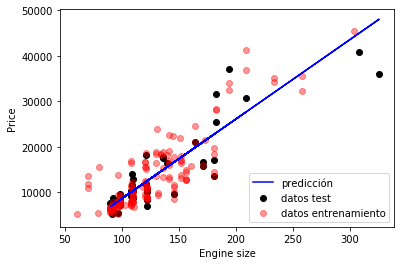

In [0]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')

plt.xlabel(r'Engine size')
plt.ylabel(r'Price')

plt.show()


## 3.2 Regresión lineal multiple
<p><a name="multiple"></a></p>


Normalmente los problemas de ML no son tan simples y los datos están compuestos de muchos predictores. En éstos casos podemos usar también el algorítmo de regresión lineal, haciendo una extensión de la ecuación de la linea a más dimensiones:
$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Donde $n$ será la cantidad de variables predictoras en nuestros datos y de nuevo $w_i$ será el **peso** del predictor $x_i$.

En éstos casos ya no tendremos una línea si no un plano, o hiperplano como modelo.

Veamos un modelo 2D.

Usemos ahora el tamaño del motor y el peso vacío como predictores del precio.

In [0]:
X = df[['engine-size','curb-weight']]
y = df['price']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 =',linearM.score(X_test,y_test))

R2 = 0.8138779449118414


In [0]:
print('w1, w2 =',linearM.coef_)
print('w0 =',linearM.intercept_)

w1, w2 = [117.18848596   4.97221762]
w0 = -14334.771686602337


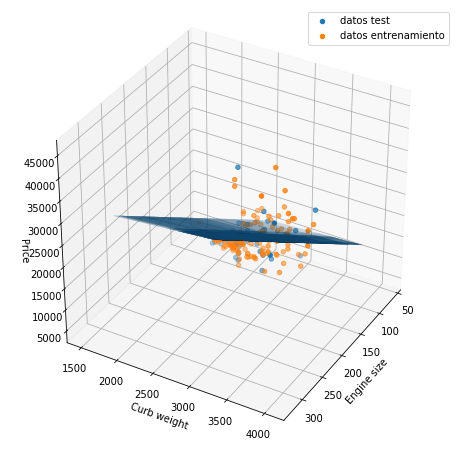

In [0]:
from mpl_toolkits.mplot3d import Axes3D

xx,yy = np.meshgrid(X_test['engine-size'].values, X_test['curb-weight'].values)
zz = linearM.intercept_+linearM.coef_[0]*xx+linearM.coef_[1]*yy

sc = plt.figure(figsize=(8,8)).gca(projection='3d')
sc.scatter(X_test['engine-size'], X_test['curb-weight'], y_test,label=r'datos test')
sc.scatter(X_train['engine-size'], X_train['curb-weight'], y_train,label=r'datos entrenamiento')
sc.plot_surface(xx, yy, zz, alpha=0.05)
sc.legend()

sc.view_init(elev=35, azim=30)
sc.set_xlabel('Engine size')
sc.set_ylabel('Curb weight')
sc.set_zlabel('Price')
plt.show()

LinearRegression usa el método de mínimos cuadrados, ésto hace que los parámetros estimados dependan fuertemente de la independencia de las características.

Cuando las columnas están fuertemente correlacionadas, llamado multicolinealidad,  el algorítmo de mínimos cuadrados es altamente sensible a variaciones aleatorias en la variable diana, haciendo que la varianza sea bastante grande.

